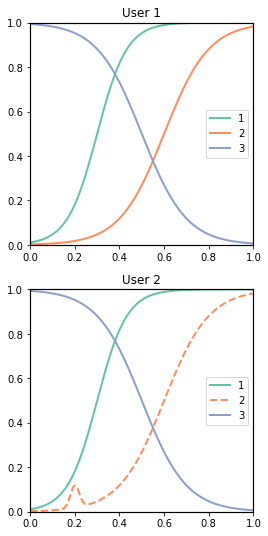

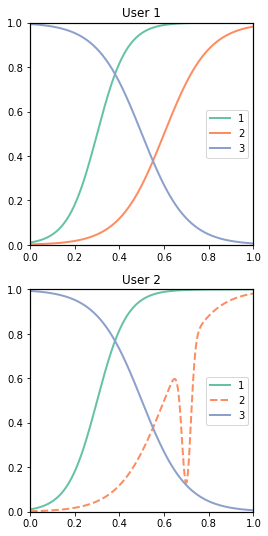

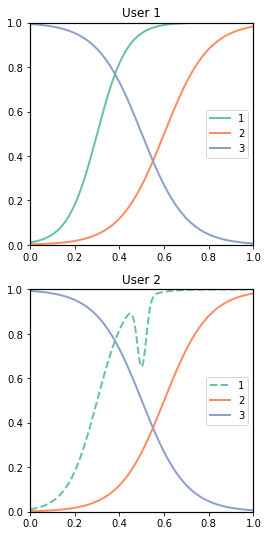

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# x 范围
x = np.linspace(0, 1, 500)

# sigmoid 函数
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(-a * (x - b)))

# perturbation 函数
def perturbation(x, center=0.5, height=0.1, width=0.02):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

# 三条 reward 曲线
def arm1(x):
    return sigmoid(x, a=15, b=0.3)

def arm2(x):
    return sigmoid(x, a=10, b=0.6)

def arm3(x):
    return sigmoid(x, a=-10, b=0.5)

# perturbed 版本
def arm_perturbed_1(x):
    return arm2(x) + perturbation(x, center=0.2, height=0.1)

def arm_perturbed_2(x):
    return arm2(x) - perturbation(x, center=0.7, height=0.6)

def arm_perturbed_3(x):
    return arm1(x) - perturbation(x, center=0.5, height=0.3)

# 颜色
cmap = plt.cm.get_cmap('Set2')
colors = [cmap(i) for i in range(4)]

def make_frame(fig, axes):
    # 设置 figure 背景色
    # 设置所有子图的边框
    for ax in axes:
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend(frameon=True)
        for spine in ax.spines.values():
            spine.set_linewidth(1.2)

# Figure 1
fig1, axes1 = plt.subplots(2,1, figsize=(4,9))
axes1[0].plot(x, arm1(x), label="1", color=colors[0], linewidth=2)
axes1[0].plot(x, arm2(x), label="2", color=colors[1], linewidth=2)
axes1[0].plot(x, arm3(x), label="3", color=colors[2], linewidth=2)

axes1[0].set_title("User 1")

axes1[1].plot(x, arm1(x), label="1", color=colors[0], linewidth=2)
axes1[1].plot(x, arm_perturbed_1(x), label="2", color=colors[1], linewidth=2, linestyle="--")
axes1[1].plot(x, arm3(x), label="3", color=colors[2], linewidth=2)

axes1[0].set_title("User 1")
axes1[1].set_title("User 2")

make_frame(fig1, axes1)
_ = plt.savefig("./plots/illustration_cluster_discrepancy_1.pdf", bbox_inches='tight')


# Figure 2
fig2, axes2 = plt.subplots(2,1, figsize=(4,9))
axes2[0].plot(x, arm1(x), label="1", color=colors[0], linewidth=2)
axes2[0].plot(x, arm2(x), label="2", color=colors[1], linewidth=2)
axes2[0].plot(x, arm3(x), label="3", color=colors[2], linewidth=2)

axes2[1].plot(x, arm1(x), label="1", color=colors[0], linewidth=2)
axes2[1].plot(x, arm_perturbed_2(x), label="2", color=colors[1], linewidth=2, linestyle="--")
axes2[1].plot(x, arm3(x), label="3", color=colors[2], linewidth=2)

axes2[0].set_title("User 1")
axes2[1].set_title("User 2")

make_frame(fig2, axes2)

_ = plt.savefig("./plots/illustration_cluster_discrepancy_2.pdf", bbox_inches='tight')


# Figure 3
fig3, axes3 = plt.subplots(2,1, figsize=(4,9))
axes3[0].plot(x, arm1(x), label="1", color=colors[0], linewidth=2)
axes3[0].plot(x, arm2(x), label="2", color=colors[1], linewidth=2)
axes3[0].plot(x, arm3(x), label="3", color=colors[2], linewidth=2)

axes3[1].plot(x, arm_perturbed_3(x), label="1", color=colors[0], linewidth=2, linestyle="--")
axes3[1].plot(x, arm2(x), label="2", color=colors[1], linewidth=2)
axes3[1].plot(x, arm3(x), label="3", color=colors[2], linewidth=2)

axes3[0].set_title("User 1")
axes3[1].set_title("User 2")

make_frame(fig3, axes3)

_ = plt.savefig("./plots/illustration_cluster_discrepancy_3.pdf", bbox_inches='tight')
